<a href="https://colab.research.google.com/github/alyhussein86/C6oUVdljHlRZgnaq/blob/main/P5_ValueInvestor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from pandas import DataFrame, to_datetime
from sklearn.metrics import mean_absolute_percentage_error
from datetime import timedelta, datetime
import holidays

## Importing Dataframe

In [2]:
# Provide the path to your Excel file
excel_file_path = '/content/2020Q1Q2Q3Q4-2021Q1.xlsx'

# Read the Excel sheet into a pandas DataFrame
df = pd.read_excel(excel_file_path,'Russia - Sberbank Rossii PAO (S')

In [3]:
print(df)

                    Date           Price                Open             High  \
0    2020-01-03 00:00:00             255              255.99           258.19   
1    2020-01-06 00:00:00           253.9              254.75           254.84   
2    2020-01-08 00:00:00          259.15              253.57           259.15   
3    2020-01-09 00:00:00          257.99               259.4           261.76   
4    2020-01-10 00:00:00          258.19              257.86           259.25   
..                   ...             ...                 ...              ...   
307  2021-03-26 00:00:00          291.22              288.63           292.75   
308  2021-03-29 00:00:00           293.3              289.72           294.09   
309  2021-03-30 00:00:00          293.25              294.86           295.72   
310  2021-03-31 00:00:00          291.02                 294           294.42   
311      Highest: 296.07  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low    Vol

In [4]:
df = df.iloc[:-1,:2]
print(df)

                    Date   Price
0    2020-01-03 00:00:00     255
1    2020-01-06 00:00:00   253.9
2    2020-01-08 00:00:00  259.15
3    2020-01-09 00:00:00  257.99
4    2020-01-10 00:00:00  258.19
..                   ...     ...
306  2021-03-25 00:00:00  286.66
307  2021-03-26 00:00:00  291.22
308  2021-03-29 00:00:00   293.3
309  2021-03-30 00:00:00  293.25
310  2021-03-31 00:00:00  291.02

[311 rows x 2 columns]


In [5]:
# Filtering DF before the Q1 of second year
specific_date_str = "2021-01-01"
specific_date = pd.to_datetime(specific_date_str)

filtered_df = df[df['Date'] < specific_date]

filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

<ipython-input-5-8da71e3a88d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)


In [6]:
print(filtered_df)

                      ds       y
0    2020-01-03 00:00:00     255
1    2020-01-06 00:00:00   253.9
2    2020-01-08 00:00:00  259.15
3    2020-01-09 00:00:00  257.99
4    2020-01-10 00:00:00  258.19
..                   ...     ...
245  2020-12-24 00:00:00  269.32
246  2020-12-25 00:00:00  270.64
247  2020-12-28 00:00:00   274.7
248  2020-12-29 00:00:00     272
249  2020-12-30 00:00:00  271.65

[250 rows x 2 columns]


In [7]:
# Convert the 'date' column to datetime objects
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

<ipython-input-7-a27fe6d10871>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])


In [8]:
print(filtered_df)

            ds       y
0   2020-01-03     255
1   2020-01-06   253.9
2   2020-01-08  259.15
3   2020-01-09  257.99
4   2020-01-10  258.19
..         ...     ...
245 2020-12-24  269.32
246 2020-12-25  270.64
247 2020-12-28   274.7
248 2020-12-29     272
249 2020-12-30  271.65

[250 rows x 2 columns]


## Plotting Current Prices of year 2020

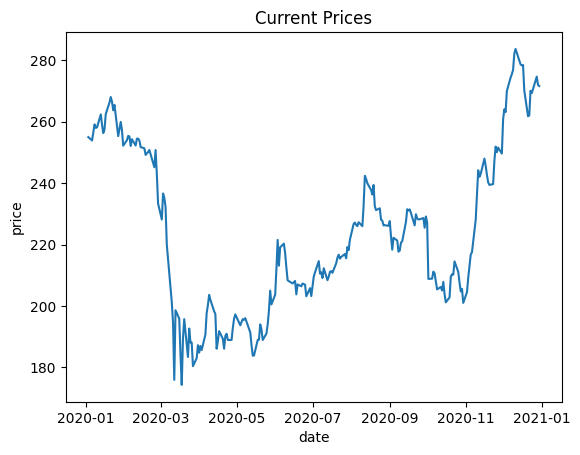

In [9]:
# plot the time series
plt.plot(filtered_df['ds'],filtered_df['y'])
# plt.plot(df_sorted['ds'])
plt.xlabel('date')
plt.ylabel('price')
plt.title('Current Prices')
plt.show()

## Applying Prophet Model

In [10]:
# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(filtered_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxo7aixul/4tj1qfu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxo7aixul/5ayykt_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52819', 'data', 'file=/tmp/tmpxo7aixul/4tj1qfu6.json', 'init=/tmp/tmpxo7aixul/5ayykt_n.json', 'output', 'file=/tmp/tmpxo7aixul/prophet_modelwoqdzyf4/prophet_model-20230905152542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Calculating working days in the period from 1st Jan to 31 Mar


In [11]:
weekend_days = [1,1,1,1,1,0,0]  # Saturday is 5, Sunday is 6

In [12]:
start_date = specific_date.date()
end_date = (specific_date + timedelta(89)).date()

In [13]:
print(start_date)
print(end_date)

2021-01-01
2021-03-31


In [14]:
# Calculate working days by excluding weekends
business_days = np.busday_count(start_date, end_date, weekmask=weekend_days)

print("Number of business days:", business_days-2) # -2 (to match the actual data of 61 days)

Number of business days: 61


In [15]:
# Including history to match data indices of current data
future = model.make_future_dataframe(periods=61, include_history=True)
future.tail(61)

,ds
250,2020-12-31
251,2021-01-01
252,2021-01-02
253,2021-01-03
254,2021-01-04
...,...
306,2021-02-25
307,2021-02-26
308,2021-02-27
309,2021-02-28


## Predicting future prices

In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail(61)

,ds,yhat
250,2020-12-31,282.513112
251,2021-01-01,282.625652
252,2021-01-02,270.223513
253,2021-01-03,271.163068
254,2021-01-04,285.111601
...,...,...
306,2021-02-25,335.128136
307,2021-02-26,335.240676
308,2021-02-27,322.838537
309,2021-02-28,323.778093


## Applying Forecasted Prices to the actual dates

In [17]:
df_future = df[df['Date'] > specific_date]
df_future['Date'] = pd.to_datetime(df_future['Date'])

<ipython-input-17-e01012146870>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['Date'] = pd.to_datetime(df_future['Date'])


In [18]:
df_future_copy = df_future.copy()

In [19]:
print(df_future_copy)

          Date   Price
250 2021-01-04     272
251 2021-01-05   275.2
252 2021-01-06  272.93
253 2021-01-08  283.64
254 2021-01-11  289.49
..         ...     ...
306 2021-03-25  286.66
307 2021-03-26  291.22
308 2021-03-29   293.3
309 2021-03-30  293.25
310 2021-03-31  291.02

[61 rows x 2 columns]


### Extracting Forecasted Yhat and applying it to the current dates

In [20]:
print(forecast['yhat'].tail(61))#.iloc[:-1])

250    282.513112
251    282.625652
252    270.223513
253    271.163068
254    285.111601
          ...    
306    335.128136
307    335.240676
308    322.838537
309    323.778093
310    337.726625
Name: yhat, Length: 61, dtype: float64


In [21]:
df_future['Price'] = forecast['yhat']

<ipython-input-21-834e5470cd4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['Price'] = forecast['yhat']


In [22]:
df_future.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

<ipython-input-22-317787f44245>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)


In [23]:
print(df_future)

            ds           y
250 2021-01-04  282.513112
251 2021-01-05  282.625652
252 2021-01-06  270.223513
253 2021-01-08  271.163068
254 2021-01-11  285.111601
..         ...         ...
306 2021-03-25  335.128136
307 2021-03-26  335.240676
308 2021-03-29  322.838537
309 2021-03-30  323.778093
310 2021-03-31  337.726625

[61 rows x 2 columns]


## Plotting Forecast

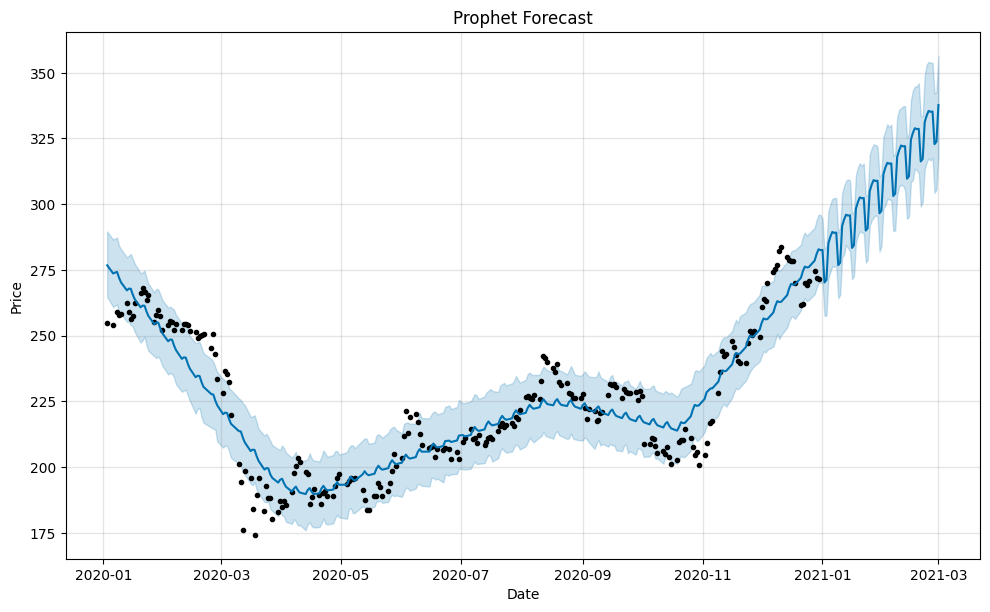

In [24]:
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

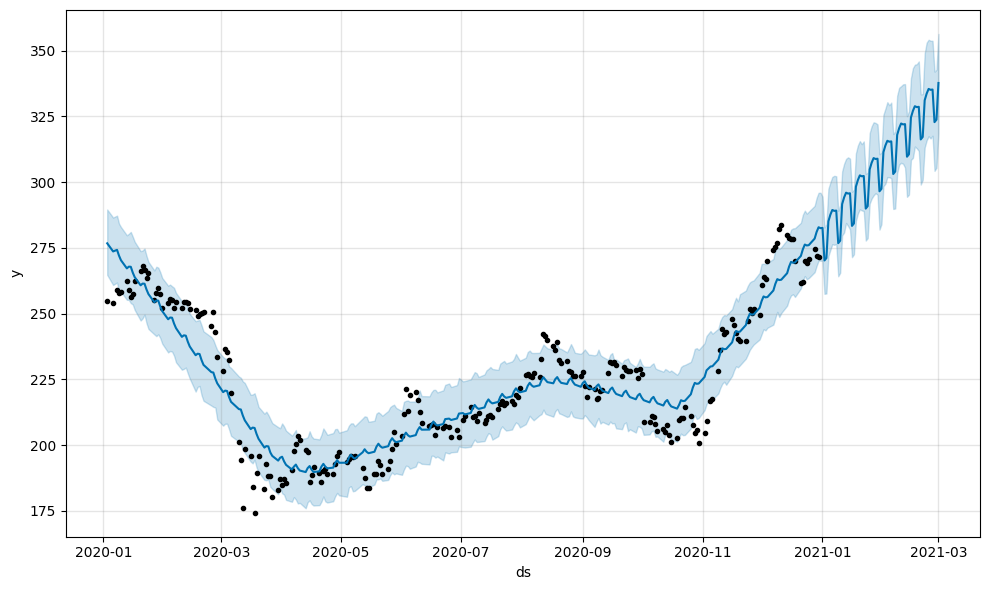

In [25]:
fig1 = model.plot(forecast)

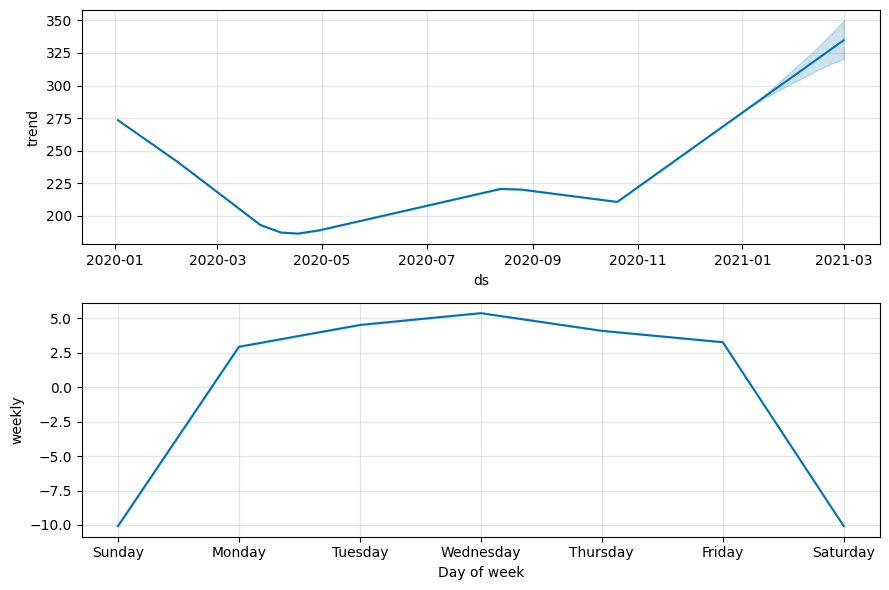

In [26]:
fig2 = model.plot_components(forecast)

In [27]:
plot_plotly(model, forecast)

## Calculating Mean Absolute Percentage Error

In [28]:
y_true = df['Price'].tail(61).values

In [31]:
y_pred = df_future['y'].values

In [32]:
print('predicted= ',y_pred,', expected= ', y_true)

predicted=  [282.51311219 282.62565173 270.22351272 271.16306845 285.11160098
 287.63390177 289.43134911 289.08999023 289.20252977 276.80039076
 277.73994649 291.68847902 294.21077981 296.00822715 295.66686826
 295.77940781 283.3772688  284.31682453 298.26535706 300.78765785
 302.58510519 302.2437463  302.35628584 289.95414684 290.89370256
 304.84223509 307.36453589 309.16198323 308.82062434 308.93316388
 296.53102487 297.4705806  311.41911313 313.94141392 315.73886126
 315.39750237 315.51004192 303.10790291 304.04745864 317.99599117
 320.51829196 322.3157393  321.97438041 322.08691996 309.68478095
 310.62433668 324.5728692  327.09517    328.89261734 328.55125845
 328.66379799 316.26165898 317.20121471 331.14974724 333.67204803
 335.46949537 335.12813649 335.24067603 322.83853702 323.77809275
 337.72662528] , expected=  [272 275.2 272.93 283.64 289.49 289.99 283.78 284.79 276.9 279.79 278.19
 279.8 274.4 268.25 265.3 269.34 265.5 265.96 258.11 263.8 263.15 263.53
 270.11 271.7 275.2 26

In [33]:
MAPE = mean_absolute_percentage_error(y_true, y_pred)

In [34]:
print('MAPE: %.3f' % MAPE)

MAPE: 0.111


## Plotting Actual vs Forecasted for the 1st Quarter 2021

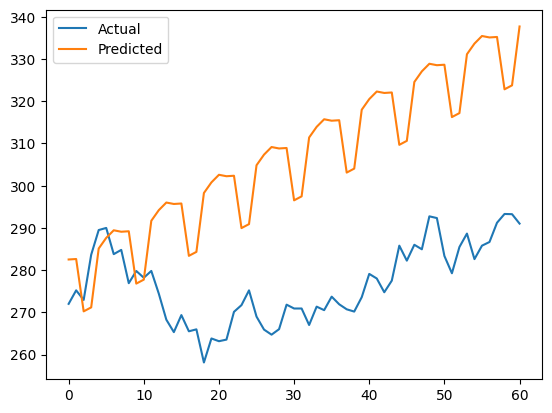

In [35]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

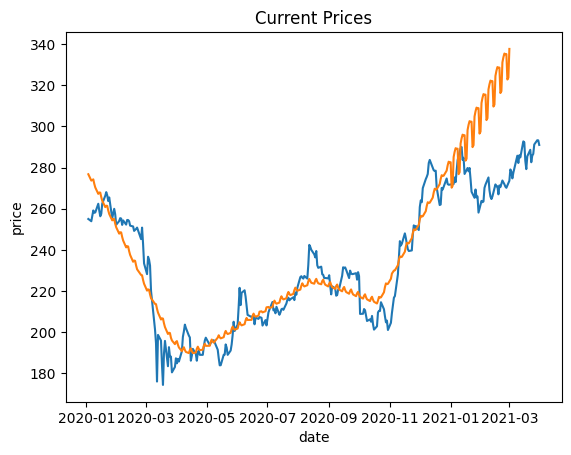

In [38]:
# plot the time series
plt.plot(df['Date'],df['Price'], label= 'Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Current Prices')
plt.show()

In [41]:
# Calculate Bollinger Bands
window = 61  # Number of periods for moving average and standard deviation
forecast['rolling_mean'] = forecast['trend'].rolling(window=window).mean()
forecast['std_dev'] = forecast['trend'].rolling(window=window).std()
forecast['upper_band'] = forecast['rolling_mean'] + 2 * forecast['std_dev']
forecast['lower_band'] = forecast['rolling_mean'] - 2 * forecast['std_dev']


SHORT - 2020-06-22 00:00:00: Short position opened at 205.09
CLOSE - 2020-06-23 00:00:00: Position closed at 205.39
LONG - 2020-10-19 00:00:00: Long position opened at 210.95
CLOSE - 2020-10-20 00:00:00: Position closed at 210.78
SHORT - 2020-11-03 00:00:00: Short position opened at 223.93
CLOSE - 2020-12-16 00:00:00: Position closed at 264.33
Final capital: 10898.58


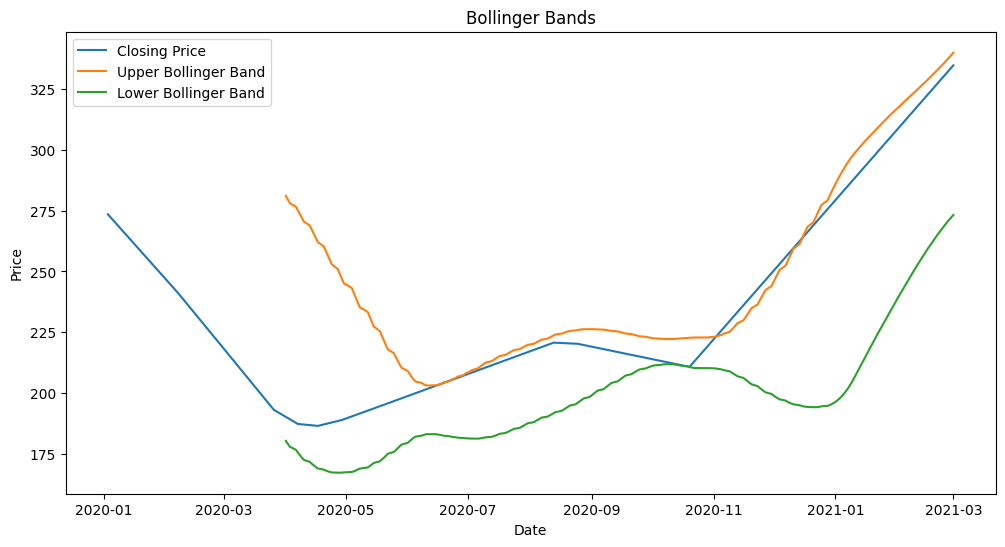

In [42]:
# Trading strategy based on Bollinger Bands
capital = 10000  # Initial capital
position = 0  # 0: No position, 1: Buy position, -1: Short position

for index, row in forecast.iterrows():
    if row['trend'] > row['upper_band']:
        if position != -1:  # Avoid multiple short positions
            position = -1
            capital += row['trend']
            print(f"SHORT - {row['ds']}: Short position opened at {row['trend']:.2f}")
    elif row['trend'] < row['lower_band']:
        if position != 1:  # Avoid multiple long positions
            position = 1
            capital -= row['trend']
            print(f"LONG - {row['ds']}: Long position opened at {row['trend']:.2f}")
    elif position != 0:
        capital += row['trend']
        position = 0
        print(f"CLOSE - {row['ds']}: Position closed at {row['trend']:.2f}")

# Close any remaining position at the end
if position != 0:
    capital += df.iloc[-1]['trend']
    print(f"Final position closed at {df.iloc[-1]['trend']:.2f}")

print(f"Final capital: {capital:.2f}")

# Plotting Bollinger Bands and closing prices
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['trend'], label='Closing Price')
plt.plot(forecast['ds'], forecast['upper_band'], label='Upper Bollinger Band')
plt.plot(forecast['ds'], forecast['lower_band'], label='Lower Bollinger Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [43]:
# Calculate moving averages (adjust window size as needed)
window = 1000
forecast['rolling_mean'] = forecast['yhat'].rolling(window=window).mean()

# Generate buy/sell/hold recommendations based on forecast and moving averages
forecast['signal'] = 1  # 0: HOLD, 1: BUY, -1: SELL


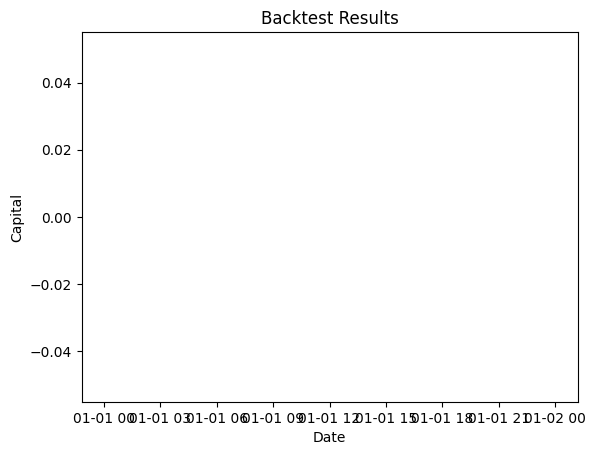

In [44]:
for i in range(window, len(forecast)):
    if forecast['yhat'][i] > forecast['rolling_mean'][i]:
        forecast['signal'][i] = 1
    elif forecast['yhat'][i] < forecast['rolling_mean'][i]:
        forecast['signal'][i] = -1

# Backtesting the strategy
capital = 100000  # Initial capital
shares_held = 0
capital_history = []

for i in range(window, len(forecast)):
    if forecast['signal'][i] == 1 and capital > 0:
        shares_held = capital / forecast['yhat'][i]
        capital = 0
    elif forecast['signal'][i] == -1 and shares_held > 0:
        capital = shares_held * forecast['yhat'][i]
        shares_held = 0

    capital_history.append(capital + shares_held * forecast['yhat'][i])

# Plot the backtest results
plt.plot(forecast['ds'][window:], capital_history)
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Backtest Results')
plt.show()
